In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("ds_salaries.csv")

In [7]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
high_salary_jobs = df['salary'] > 10000
high_salary_jobs

0      True
1      True
2      True
3      True
4      True
       ... 
602    True
603    True
604    True
605    True
606    True
Name: salary, Length: 607, dtype: bool

In [9]:
mean_salary_by_title = df.groupby('job_title')['salary'].mean()
mean_salary_by_title.head(10)

job_title
3D Computer Vision Researcher         4.000000e+05
AI Scientist                          2.905714e+05
Analytics Engineer                    1.750000e+05
Applied Data Scientist                1.724000e+05
Applied Machine Learning Scientist    1.413500e+05
BI Data Analyst                       1.902045e+06
Big Data Architect                    1.250000e+05
Big Data Engineer                     4.550000e+05
Business Data Analyst                 3.550000e+05
Cloud Data Engineer                   1.400000e+05
Name: salary, dtype: float64

In [10]:
df.dropna(inplace=True)
df.fillna(0, inplace=True)
df.drop_duplicates(inplace=True)

In [11]:
mean_salary = np.mean(df['salary'])
median_salary = np.median(df['salary'])
print("This is mean and :",mean_salary," \n This is median", median_salary)

This is mean and : 324000.0626029654  
 This is median 115000.0


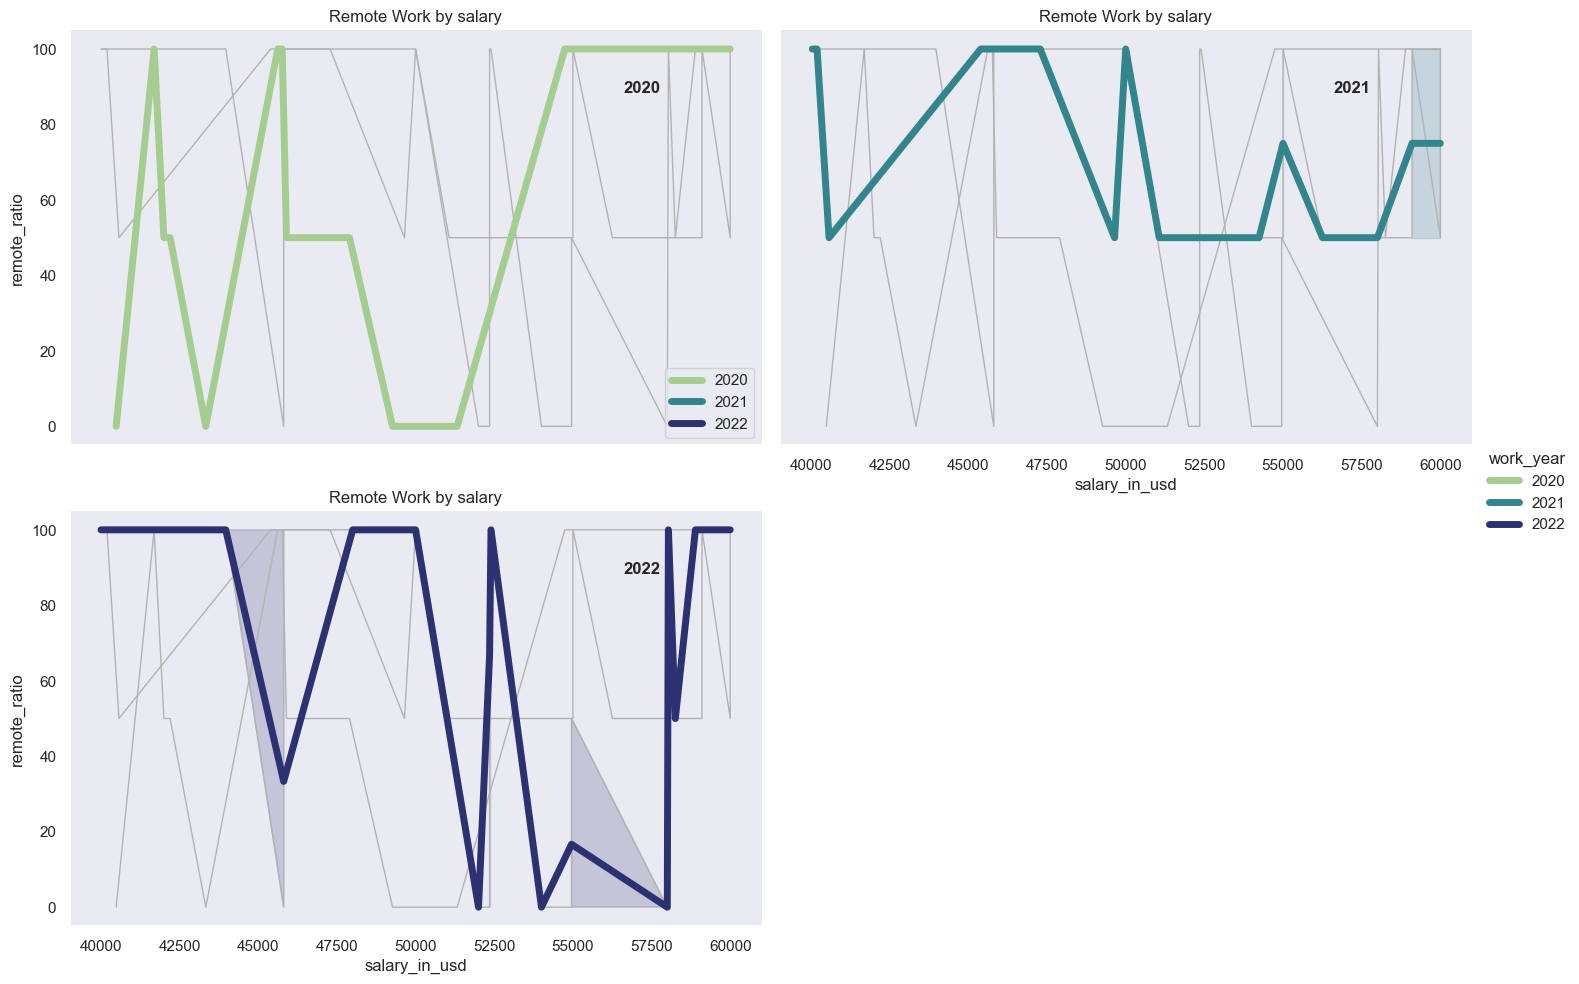

In [12]:
import seaborn as sns

filtered_df = df[(df['salary_in_usd'] >= 40000) & (df['salary_in_usd'] <= 60000)]

sns.set_theme(style="dark")

g = sns.relplot(
    data=filtered_df,  # Use the filtered DataFrame
    x="salary_in_usd", y="remote_ratio", col="work_year", hue="work_year",
    kind="line", palette="crest", linewidth=5, zorder=4,
    col_wrap=2, height=5, aspect=1.5, legend=True,
)

for year, ax in g.axes_dict.items():

    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=filtered_df, x="salary_in_usd", y="remote_ratio", units="work_year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

g.set_titles("Remote Work by salary")
g.set_axis_labels("salary_in_usd", "remote_ratio")

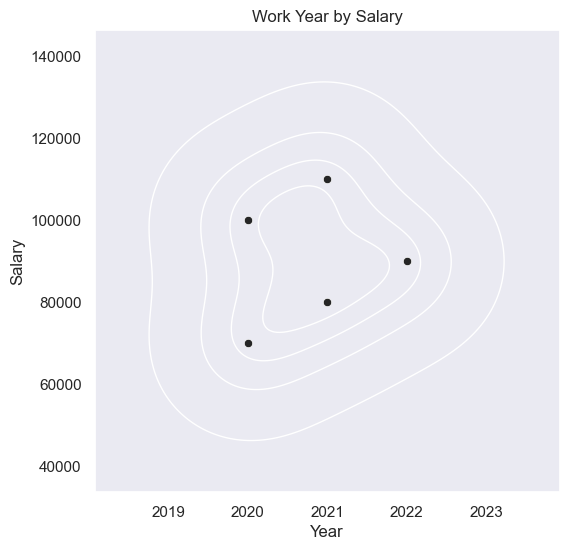

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains your data
# Generate some sample data for demonstration
data = {
    'work_year': [2020, 2021, 2022, 2020, 2021],
    'salary': [70000, 80000, 90000, 100000, 110000]
}
df = pd.DataFrame(data)

# Calculate mean of work_year and salary
mean = df[['work_year', 'salary']].mean()

# Calculate covariance matrix
cov_matrix = df[['work_year', 'salary']].cov()

# Plotting
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x='work_year', y='salary', data=df, ax=ax, color=".15")
sns.histplot(data=df, x='work_year', y='salary', bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(data=df, x='work_year', y='salary', levels=5, color="w", linewidths=1)

ax.set(title="Work Year by Salary", xlabel="Year", ylabel="Salary")

plt.show()


In [15]:
count_FT = np.count_nonzero(df['employment_type'] == 'FT')
count_CT = np.count_nonzero(df['employment_type'] == 'CT')
count_PT = np.count_nonzero(df['employment_type'] == 'PT')
count_FL = np.count_nonzero(df['employment_type'] == 'FL')

count_employee = [count_FL, count_PT, count_CT, count_FT]

print(count_employee)

[4, 10, 5, 588]


In [ ]:
df['employment_type'].unique()

In [ ]:
df['job_title'].unique()

In [17]:
count_DA = np.count_nonzero(df['job_title'] == 'Data Analyst')
count_DE = np.count_nonzero(df['job_title'] == 'Data Engineer')
count_DAE = np.count_nonzero(df['job_title'] == 'Data Analytics Engineer')
count_MLE = np.count_nonzero(df['job_title'] == 'Machine Learning Scientist')

count_job = count_DA, count_DE, count_DAE, count_MLE

count_job

(97, 132, 4, 8)

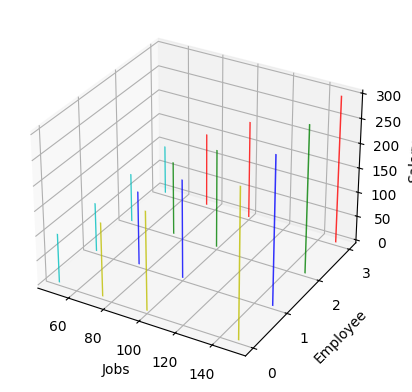

In [34]:


# Fixing random state for reproducibility


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = count_job
    ys = count_employee

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('Jobs')
ax.set_ylabel('Employee')
ax.set_zlabel('Salary')

# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()

In [26]:
ds = pd.read_csv("ds_salaries.csv")

In [27]:
ds.head(3)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


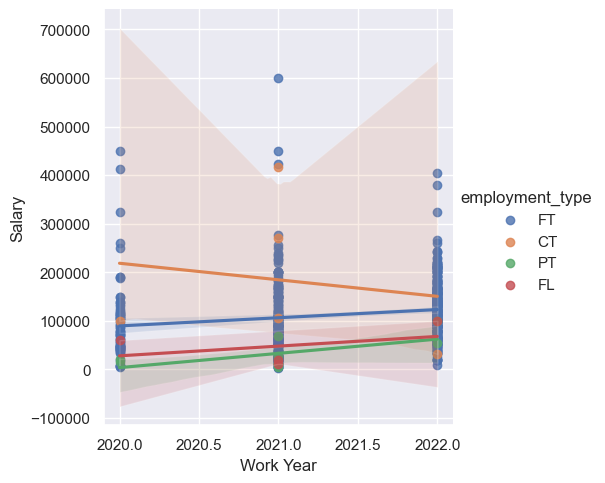

In [39]:
import seaborn as sns

sns.set_theme()

# Plot salary as a function of work_year colored by employment_type
g = sns.lmplot(
    data=ds,
    x="work_year", y="salary_in_usd", hue="employment_type",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Work Year", "Salary")


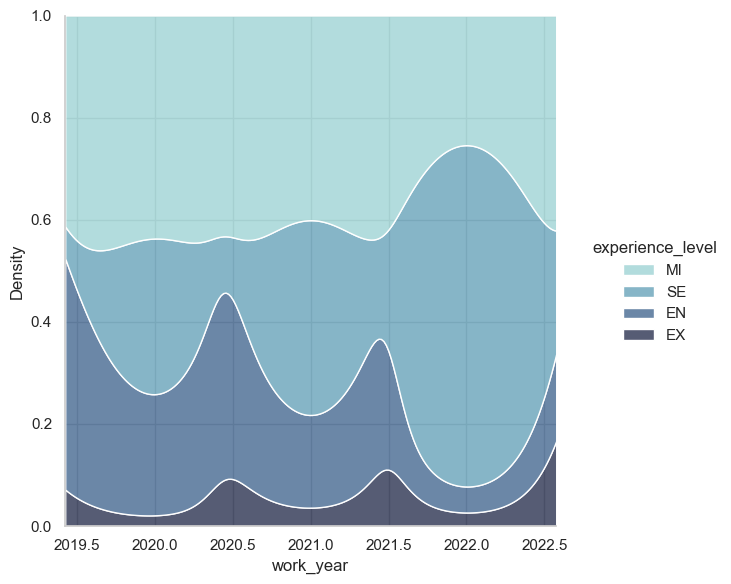

In [42]:
import seaborn as sns
sns.set_theme(style="whitegrid")


# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=ds,
    x="work_year", hue="experience_level",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

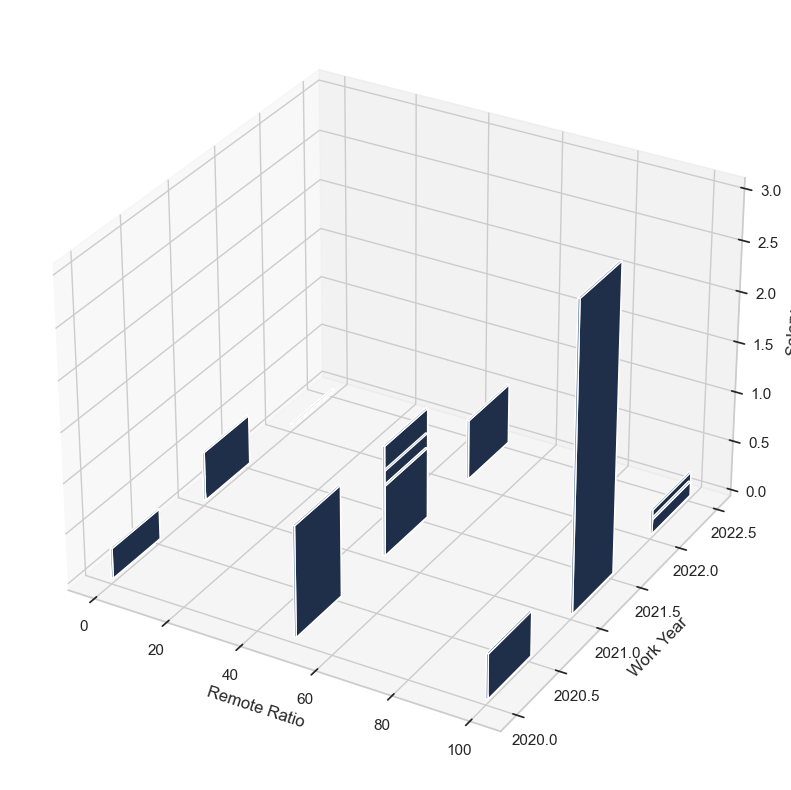

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and an axis with 3D projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Extracting data from DataFrame
x = ds['remote_ratio']
y = ds['work_year']
z = ds['salary']

# Plot the 3D bars
ax.bar3d(x, y, 0, 0.5, 0.5, z)

# Set labels for the axes
ax.set_xlabel('Remote Ratio')
ax.set_ylabel('Work Year')
ax.set_zlabel('Salary')

# Show the plot
plt.show()


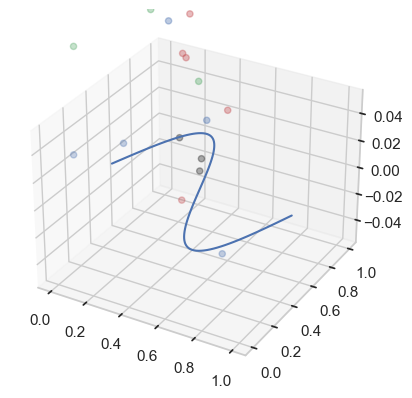

In [54]:
ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
c_list = []
for c in colors:
    c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x, z)')